In [1]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from kmeans import *
from tf_idf import *
from data import *
import pandas as pd
import numpy as np
from rfm import *
from graph import *
from sklearn.cluster import DBSCAN
from pca import *
from sklearn.neighbors import NearestNeighbors

In [2]:
df = load_data()

# TF-IDF RFM model Analysis

## 1. Evaluate the best number of Cluster on product by TF-IDF weight

In [3]:
matrix = tf_idf(df)

In [4]:
sse, sscore, test_range = kmeans(matrix)

Clusters = 2 ,Silhouette Score = 0.06539
Clusters = 3 ,Silhouette Score = 0.0973
Clusters = 4 ,Silhouette Score = 0.12028
Clusters = 5 ,Silhouette Score = 0.13913
Clusters = 6 ,Silhouette Score = 0.14752
Clusters = 7 ,Silhouette Score = 0.11348
Clusters = 8 ,Silhouette Score = 0.08078
Clusters = 9 ,Silhouette Score = 0.07797
Clusters = 10 ,Silhouette Score = 0.08938
Clusters = 11 ,Silhouette Score = 0.06361
Clusters = 12 ,Silhouette Score = 0.04589
Clusters = 13 ,Silhouette Score = 0.03957
Clusters = 14 ,Silhouette Score = 0.0869


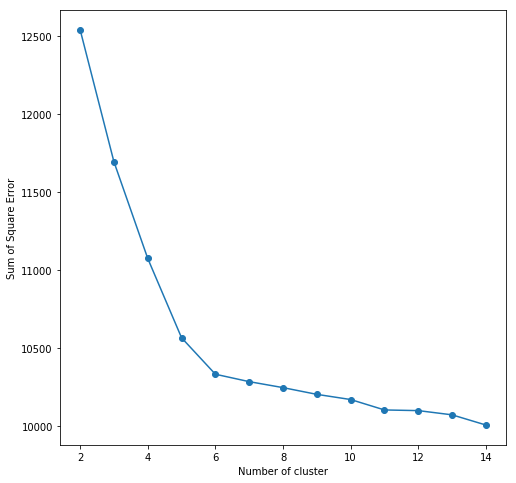

In [5]:
# Plot elbow method
plt.figure(figsize=(8, 8))
plt.plot(list(test_range), sse, '-o')
plt.xlabel('Number of cluster')
plt.ylabel('Sum of Square Error')

# Display the Silhouette score
for n_cluster, score in sscore.items():
    print("Clusters = {}".format(n_cluster),",Silhouette Score = {}".format(score))

In [6]:
clusters = kmeans(matrix = matrix, cluster_num = 6)

In [7]:
def silhouette_graph(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    #____________________________
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        #___________________________________________________________________________________
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
        #____________________________________________________________________
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        #______________________________________
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10

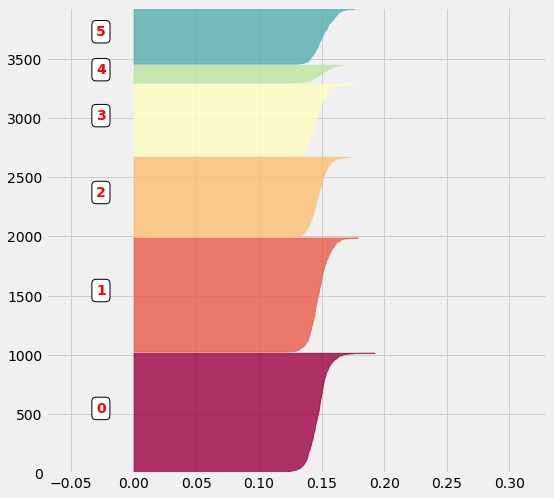

In [8]:
# Plot Silhouette graph
sample_silhouette_values = silhouette_samples(matrix, clusters)
silhouette_graph(6, [-0.07, 0.33], len(matrix), sample_silhouette_values, clusters)

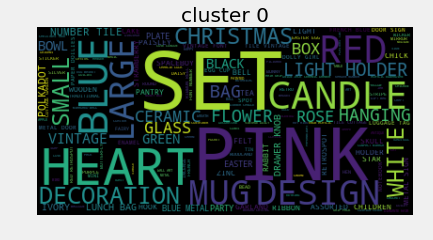

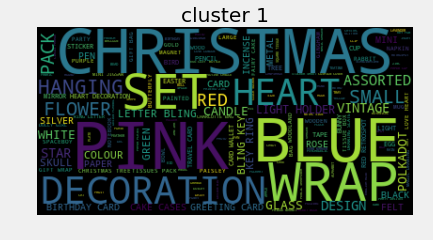

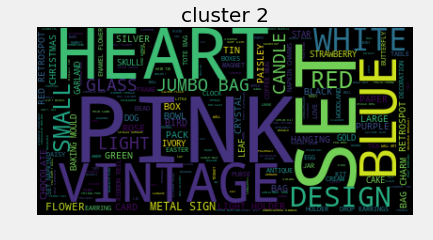

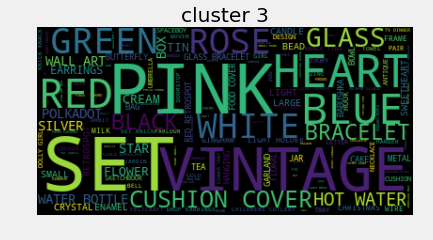

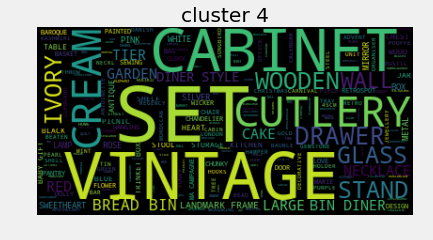

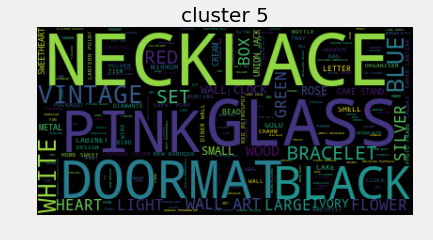

In [9]:
# Plot word cloud
d_list = df['Description'].unique().tolist()
prod_cluster = defaultdict(list)
for i in range(len(clusters)):
    cluster_num = clusters[i]
    prod_cluster[cluster_num].append(d_list[i])
for i in range(len(prod_cluster)):
    s = " "
    words = s.join(prod_cluster[i])
    wordcloud = WordCloud().generate(text = words)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('cluster {}'.format(i))
    plt.show()

In [10]:
df = tf_idf_write_back(df,clusters)

## 2. Categorical level RFM with Kmeans++

Clusters = 2 ,Silhouette Score = 0.34976
Clusters = 3 ,Silhouette Score = 0.23696
Clusters = 4 ,Silhouette Score = 0.23206
Clusters = 5 ,Silhouette Score = 0.20141
Clusters = 6 ,Silhouette Score = 0.19398
Clusters = 7 ,Silhouette Score = 0.17704
Clusters = 8 ,Silhouette Score = 0.1791
Clusters = 9 ,Silhouette Score = 0.1754
Clusters = 10 ,Silhouette Score = 0.1669
Clusters = 11 ,Silhouette Score = 0.16312
Clusters = 12 ,Silhouette Score = 0.16014
Clusters = 13 ,Silhouette Score = 0.1527
Clusters = 14 ,Silhouette Score = 0.15155


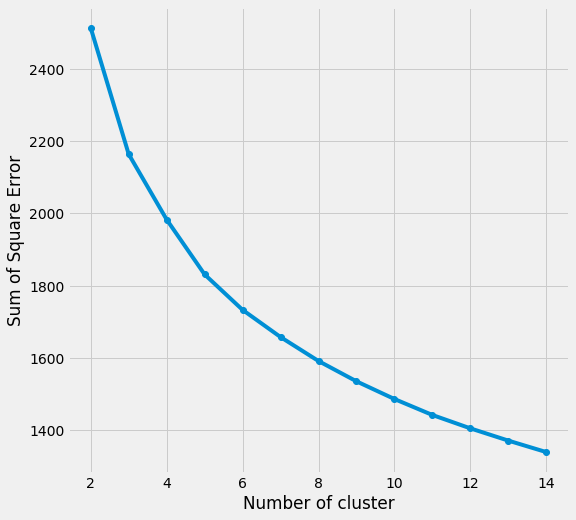

In [11]:
tf_idf_rfm = rfm(df,model_type='TF-IDF')
tf_idf_rfm_trans = rfm_transform(tf_idf_rfm)
matrix_trans = rfm_matrix(tf_idf_rfm_trans,model_type=1)
sse, sscore, test_range = kmeans(matrix_trans)
# Plot elbow method
plt.figure(figsize=(8, 8))
plt.plot(list(test_range), sse, '-o')
plt.xlabel('Number of cluster')
plt.ylabel('Sum of Square Error')

# Display the Silhouette score
for n_cluster, score in sscore.items():
    print("Clusters = {}".format(n_cluster),",Silhouette Score = {}".format(score))

0.6701270914223797
0.1183460888472435
0.09535643341224388
0.012245245560369135
0.08137404503051325
0.06969006314584855
0.0330119899827674
0.03792292436810121
0.043094625106674216
0.04809518426837478
[0.55416126 0.09786624]


/Users/waynechen/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


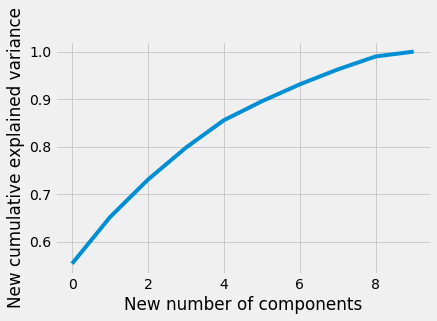

In [12]:
pca_test(tf_idf_rfm_trans)

In [13]:
clusters_trans = kmeans(matrix = matrix_trans, cluster_num = 4)
kmeans_cate = tf_idf_rfm.copy()
kmeans_cate = rfm_write_back(kmeans_cate,clusters_trans) 
display(kmeans_cate.head(5))
kmeans_cate.groupby("Cluster", as_index = False)['CustomerID'].count()

,CustomerID,Frequency,Recency,Amount,cate_1,cate_2,cate_3,cate_4,cate_5,cate_6,Cluster
0,17850,34,372,5391.21,594.12,0.00,1048.50,1878.04,607.75,1262.80,3
1,13047,9,56,3232.59,494.78,277.18,536.48,956.90,140.80,826.45,3
2,12583,15,2,6705.38,1532.50,1448.88,1166.40,2082.10,230.25,245.25,3
3,13748,5,95,948.25,147.00,52.68,577.32,48.20,93.65,29.40,3
4,15100,3,333,876.00,0.00,0.00,0.00,0.00,876.00,0.00,3


,Cluster,CustomerID
0,0,1018
1,1,847
2,2,822
3,3,1635


## 3. Normalized continuous data RFM with Kmeans++

Clusters = 2 ,Silhouette Score = 0.71417
Clusters = 3 ,Silhouette Score = 0.63272
Clusters = 4 ,Silhouette Score = 0.53676
Clusters = 5 ,Silhouette Score = 0.55159
Clusters = 6 ,Silhouette Score = 0.54195
Clusters = 7 ,Silhouette Score = 0.51412
Clusters = 8 ,Silhouette Score = 0.52413
Clusters = 9 ,Silhouette Score = 0.45636
Clusters = 10 ,Silhouette Score = 0.44302
Clusters = 11 ,Silhouette Score = 0.45407
Clusters = 12 ,Silhouette Score = 0.45448
Clusters = 13 ,Silhouette Score = 0.45511
Clusters = 14 ,Silhouette Score = 0.45672


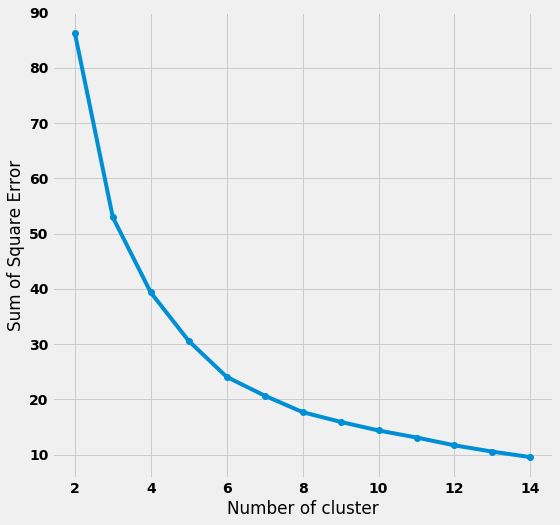

In [17]:
matrix_norm = rfm_matrix(tf_idf_rfm, model_type=1)
sse, sscore, test_range = kmeans(matrix_norm)
# Plot elbow method
plt.figure(figsize=(8, 8))
plt.plot(list(test_range), sse, '-o')
plt.xlabel('Number of cluster')
plt.ylabel('Sum of Square Error')

# Display the Silhouette score
for n_cluster, score in sscore.items():
    print("Clusters = {}".format(n_cluster),",Silhouette Score = {}".format(score))

0.07218275223465201
0.0040911457014731435
0.0007328489449323305
0.0006234742556479785
0.0002451657860389739
0.00014280997916507357
9.32779075472238e-05
2.9926576719411794e-05
7.427587698349755e-20
[0.9237453  0.05235567]


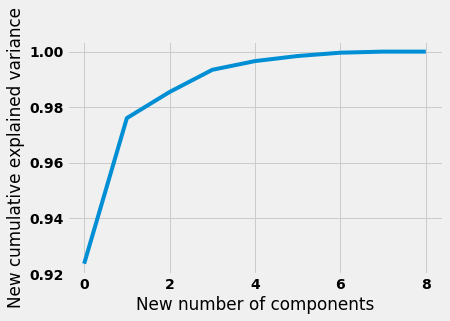

In [18]:
tf_idf_rfm_norm = norm(tf_idf_rfm.iloc[:,1:])
pca_test(tf_idf_rfm_norm)

In [19]:
clusters_norm = kmeans(matrix = matrix_norm, cluster_num = 5)
kmeans_norm = tf_idf_rfm.copy()
kmeans_norm = rfm_write_back(kmeans_norm,clusters_norm)   
display(kmeans_norm.head(5))
kmeans_norm.groupby("Cluster", as_index = False)['CustomerID'].count()

,CustomerID,Frequency,Recency,Amount,cate_1,cate_2,cate_3,cate_4,cate_5,cate_6,Cluster
0,17850,34,372,5391.21,594.12,0.00,1048.50,1878.04,607.75,1262.80,0
1,13047,9,56,3232.59,494.78,277.18,536.48,956.90,140.80,826.45,1
2,12583,15,2,6705.38,1532.50,1448.88,1166.40,2082.10,230.25,245.25,2
3,13748,5,95,948.25,147.00,52.68,577.32,48.20,93.65,29.40,1
4,15100,3,333,876.00,0.00,0.00,0.00,0.00,876.00,0.00,0


,Cluster,CustomerID
0,0,498
1,1,1078
2,2,2111
3,3,617
4,4,18


## 4. Categorical level RFM with DBSCAN

In [23]:
X_trans = tf_idf_rfm_trans.iloc[:,1:]
X_trans = X_trans.drop(['Amount'], axis=1)

In [24]:
X_distance = X_trans.values
nbrs = NearestNeighbors(n_neighbors=len(X_distance)).fit(X_distance)
distances, indices = nbrs.kneighbors(X_distance)
distances.mean()

5.338744493952052

In [25]:
db = DBSCAN(eps= 1, min_samples=17).fit(X_trans)
labels_trans = db.labels_
dbscan_cate = tf_idf_rfm.copy()
dbscan_cate = rfm_write_back(dbscan_cate,labels_trans) 
display(dbscan_cate.head(5))
n_clusters_trans = len(set(labels_trans)) - (1 if -1 in labels_trans else 0)
print(n_clusters_trans)
X_trans['DBcluster'] = labels_trans
X_trans.groupby("DBcluster", as_index = False).count()

,CustomerID,Frequency,Recency,Amount,cate_1,cate_2,cate_3,cate_4,cate_5,cate_6,Cluster
0,17850,34,372,5391.21,594.12,0.00,1048.50,1878.04,607.75,1262.80,-1
1,13047,9,56,3232.59,494.78,277.18,536.48,956.90,140.80,826.45,0
2,12583,15,2,6705.38,1532.50,1448.88,1166.40,2082.10,230.25,245.25,-1
3,13748,5,95,948.25,147.00,52.68,577.32,48.20,93.65,29.40,0
4,15100,3,333,876.00,0.00,0.00,0.00,0.00,876.00,0.00,0


4


,DBcluster,Frequency,Recency,cate_1,cate_2,cate_3,cate_4,cate_5,cate_6
0,-1,3512,3512,3512,3512,3512,3512,3512,3512
1,0,211,211,211,211,211,211,211,211
2,1,520,520,520,520,520,520,520,520
3,2,47,47,47,47,47,47,47,47
4,3,32,32,32,32,32,32,32,32


## 5. Normalized continuous data RFM with DBSCAN

In [29]:
X_norm = norm(tf_idf_rfm.iloc[:,1:])
X_norm = X_norm.drop(['Amount'], axis=1)

In [30]:
X_distance = X_norm.values
nbrs = NearestNeighbors(n_neighbors=len(X_distance)).fit(X_distance)
distances, indices = nbrs.kneighbors(X_distance)
distances.mean()

0.2930783088774555

In [31]:
db = DBSCAN(eps= 0.01, min_samples=20).fit(X_norm)
labels_norm = db.labels_
dbscan_norm = tf_idf_rfm.copy()
dbscan_norm = rfm_write_back(dbscan_norm,labels_norm) 
display(dbscan_norm.head(5))
n_clusters_norm = len(set(labels_norm)) - (1 if -1 in labels_norm else 0)
print(n_clusters_norm)
X_norm['DBcluster'] = labels_norm
X_norm.groupby("DBcluster", as_index = False).count()

,CustomerID,Frequency,Recency,Amount,cate_1,cate_2,cate_3,cate_4,cate_5,cate_6,Cluster
0,17850,34,372,5391.21,594.12,0.00,1048.50,1878.04,607.75,1262.80,-1
1,13047,9,56,3232.59,494.78,277.18,536.48,956.90,140.80,826.45,-1
2,12583,15,2,6705.38,1532.50,1448.88,1166.40,2082.10,230.25,245.25,-1
3,13748,5,95,948.25,147.00,52.68,577.32,48.20,93.65,29.40,-1
4,15100,3,333,876.00,0.00,0.00,0.00,0.00,876.00,0.00,-1


6


,DBcluster,Frequency,Recency,cate_1,cate_2,cate_3,cate_4,cate_5,cate_6
0,-1,1096,1096,1096,1096,1096,1096,1096,1096
1,0,108,108,108,108,108,108,108,108
2,1,2262,2262,2262,2262,2262,2262,2262,2262
3,2,421,421,421,421,421,421,421,421
4,3,388,388,388,388,388,388,388,388
5,4,29,29,29,29,29,29,29,29
6,5,18,18,18,18,18,18,18,18


## 6. Compute the score with results of the clusters above

In [35]:
from evaluation import *
result = get_score(matrix_trans,clusters_trans,'Categorical  TF-IDF RFM Kmeans++')
result = get_score(matrix_norm,clusters_norm,'Norm TF-IDF RFM Kmeans++',result,flag=1)
matrix_trans = X_trans.values
result = get_score(matrix_trans,labels_trans,'Categorical TF-IDF RFM DBSCAN',result,flag=1)
matrix_norm = X_norm.values
result = get_score(matrix_norm,labels_norm,'Norm TF-IDF RFM DBSCAN',result,flag=1)
print(result)

/Users/waynechen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/waynechen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/waynechen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/Users/waynechen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


                              Model Silhouette Coefficient  \
0  Categorical  TF-IDF RFM Kmeans++                0.23206   
1          Norm TF-IDF RFM Kmeans++                0.55159   
2     Categorical TF-IDF RFM DBSCAN                  0.008   
3            Norm TF-IDF RFM DBSCAN                0.89224   

  Calinski-Harabaz Index Davies-Bouldin Index  
0             1698.09124              1.69319  
1                  10712              0.75841  
2                506.162              0.97333  
3                59193.4              0.10003  


## 7. Identify Segementation

# Visualization of the results from categorical level RFM with Kmeans++

In [14]:
n_attributes = len(kmeans_cate.columns) - 5
customer_clustering = df_for_chart(kmeans_cate, n_attributes)
display(customer_clustering)

,Sum $,Med. $,Size,Med. Visit,Median $ per Visit,cate_1,cate_1 mean,cate_1 std,cate_2,cate_2 mean,...,cate_3 std,cate_4,cate_4 mean,cate_4 std,cate_5,cate_5 mean,cate_5 std,cate_6,cate_6 mean,cate_6 std
Cluster,,,,,,,,,,,,,,,,,,,,,
3,4506224.93,1008.390,1635,4,283.330,24.518443,675.753015,2948.556610,11.564033,318.716410,...,2797.914693,18.031108,496.955517,1817.825045,5.951601,164.032128,696.927292,14.370963,396.078239,1175.353283
2,1694542.90,735.935,822,3,298.485,23.075828,475.705353,1257.903245,10.597416,218.464428,...,2322.195480,18.899148,389.603613,1691.781410,6.298802,129.849027,689.698043,15.889194,327.553783,1235.533948
1,1216178.43,612.780,847,2,292.035,20.050966,287.904982,454.753223,10.157957,145.854640,...,732.344222,17.389701,249.692786,1169.071648,8.112740,116.488064,1333.333325,24.912756,357.713778,5233.088849
0,707014.39,379.170,1018,1,274.055,25.212877,175.106749,274.990672,12.548644,87.151984,...,240.352769,17.834010,123.859548,231.515336,10.700475,74.316208,1244.933380,12.384834,86.014303,155.817508


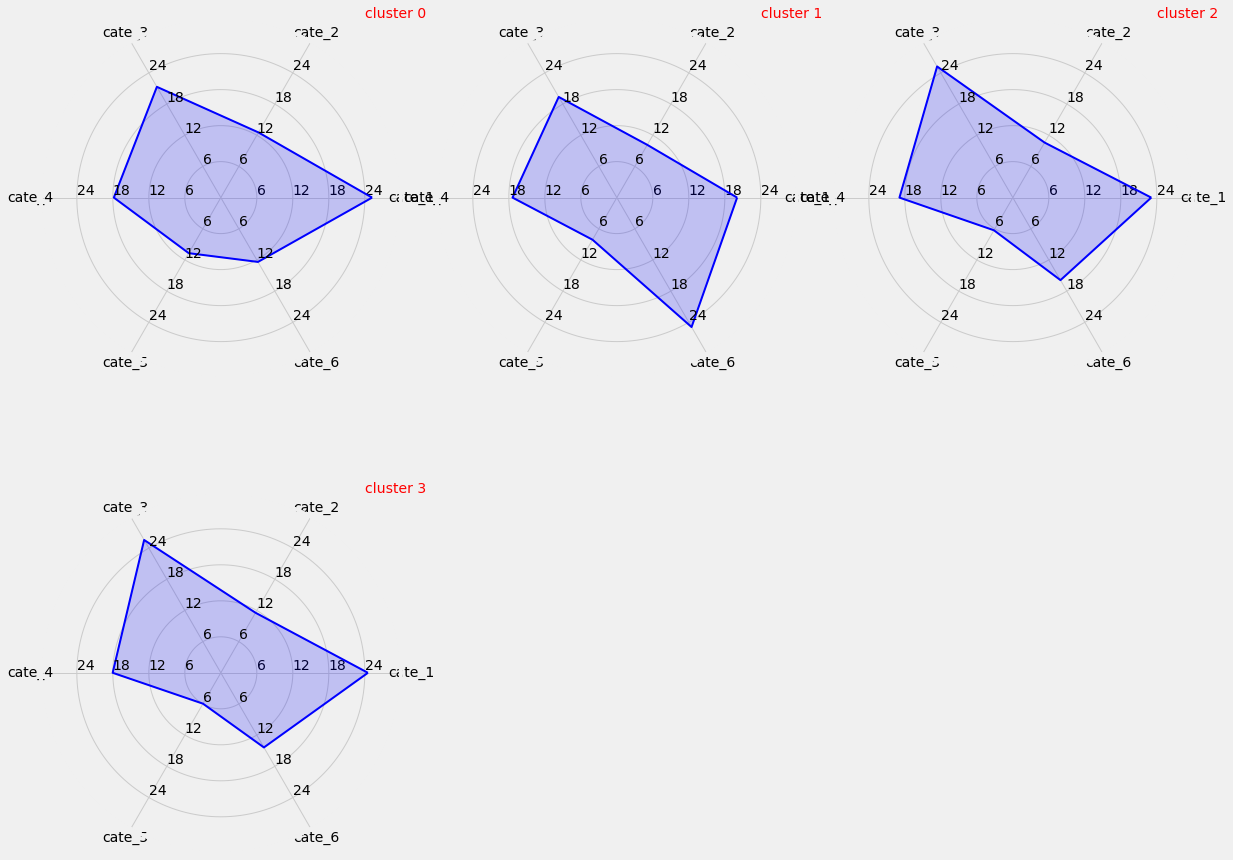

In [15]:
n_clusters = len(customer_clustering.index)
radar_chart(customer_clustering, n_clusters, n_attributes)

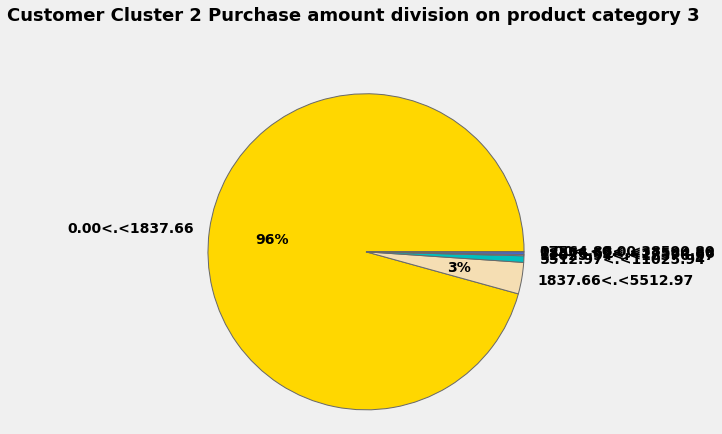

In [37]:
#for i in range(n_clusters):
    #for j in range(1, n_attributes+1):
        #pie_chart(kmeans_cate, i, j)
pie_chart(kmeans_cate, 2, 3)

# Visualization of the results from normalized continuous data RFM with Kmeans++

In [20]:
n_attributes = len(kmeans_norm.columns) - 5
customer_clustering = df_for_chart(kmeans_norm, n_attributes)
display(customer_clustering)

,Sum $,Med. $,Size,Med. Visit,Median $ per Visit,cate_1,cate_1 mean,cate_1 std,cate_2,cate_2 mean,...,cate_3 std,cate_4,cate_4 mean,cate_4 std,cate_5,cate_5 mean,cate_5 std,cate_6,cate_6 mean,cate_6 std
Cluster,,,,,,,,,,,,,,,,,,,,,
0,196724.20,261.490,498,1.0,224.430000,21.852827,86.324900,122.202875,10.183745,40.228695,...,239.161635,17.129555,67.666627,143.473264,9.347249,36.924297,102.272392,18.782056,74.194478,168.625655
1,1067729.70,624.795,1078,2.0,308.938000,25.695520,254.507143,332.739378,12.911805,127.887922,...,424.464558,18.279351,181.052004,357.882605,5.703700,56.493599,146.298741,14.122337,139.877913,256.432720
2,4807677.78,1132.030,2111,4.0,298.050000,24.274006,552.826153,861.328607,11.676868,265.933766,...,1142.353261,18.595794,423.508228,903.952503,5.802502,132.148565,430.582535,15.373245,350.116580,860.864619
4,1662404.25,61304.795,18,51.5,1575.261774,20.953298,19351.584444,20569.061276,9.019116,8329.676111,...,16163.461170,17.533314,16193.030556,11862.424686,7.269384,6713.697222,9042.715904,19.135050,17672.326667,33008.925329
3,389424.72,348.150,617,1.0,234.385000,21.905939,138.261167,188.226238,11.227143,70.861053,...,185.775447,14.375767,90.733857,167.449785,18.013019,113.690681,1606.218800,16.035972,101.212382,186.605089


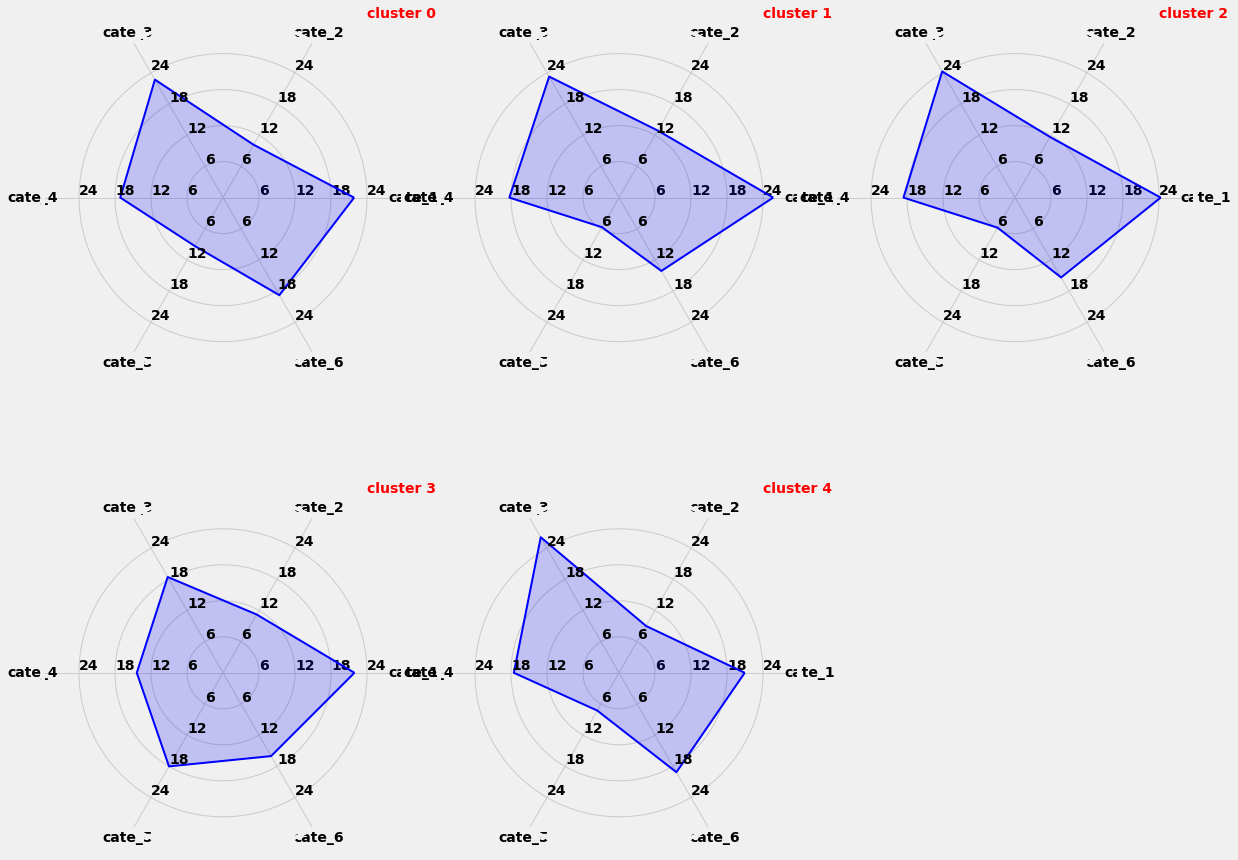

In [21]:
n_clusters = len(customer_clustering.index)
radar_chart(customer_clustering, n_clusters, n_attributes)

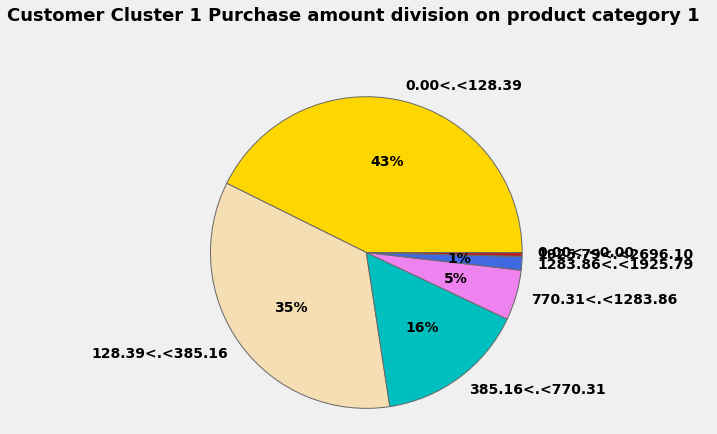

In [38]:
#for i in range(n_clusters):
    #for j in range(1, n_attributes+1):
        #pie_chart(kmeans_norm, i, j)
pie_chart(kmeans_norm, 1, 1)

# Visualization of the results from categorical level RFM with DBSCAN

In [26]:
n_attributes = len(dbscan_cate.columns) - 5
temp_cate = dbscan_cate[dbscan_cate['Cluster']!=-1]
customer_clustering = df_for_chart(temp_cate, n_attributes)
display(customer_clustering)

,Sum $,Med. $,Size,Med. Visit,Median $ per Visit,cate_1,cate_1 mean,cate_1 std,cate_2,cate_2 mean,...,cate_3 std,cate_4,cate_4 mean,cate_4 std,cate_5,cate_5 mean,cate_5 std,cate_6,cate_6 mean,cate_6 std
Cluster,,,,,,,,,,,,,,,,,,,,,
0,594557.27,1078.960,211,4,286.518571,22.185170,625.135261,1011.424796,8.831931,248.866777,...,3432.463206,19.304568,543.965450,1381.834167,4.368503,123.095972,263.158808,11.696498,329.584739,548.459192
1,286502.85,342.345,520,1,269.350000,26.716464,147.198904,252.540798,12.907174,71.114269,...,203.603281,19.639501,108.207173,223.830085,5.596070,30.832500,126.294424,12.063524,66.466038,128.475888
2,41205.05,567.360,47,1,283.680000,23.931751,209.810426,259.539202,13.554309,118.831064,...,209.338736,21.219705,186.033830,268.105685,5.440110,47.693617,92.404178,15.766878,138.228723,218.051956
3,62350.31,490.475,32,2,233.954167,10.944918,213.255937,338.251376,5.205539,101.427187,...,177.688710,6.807617,132.642812,192.987725,65.909055,1284.203125,6885.533530,5.002541,97.471875,122.206822


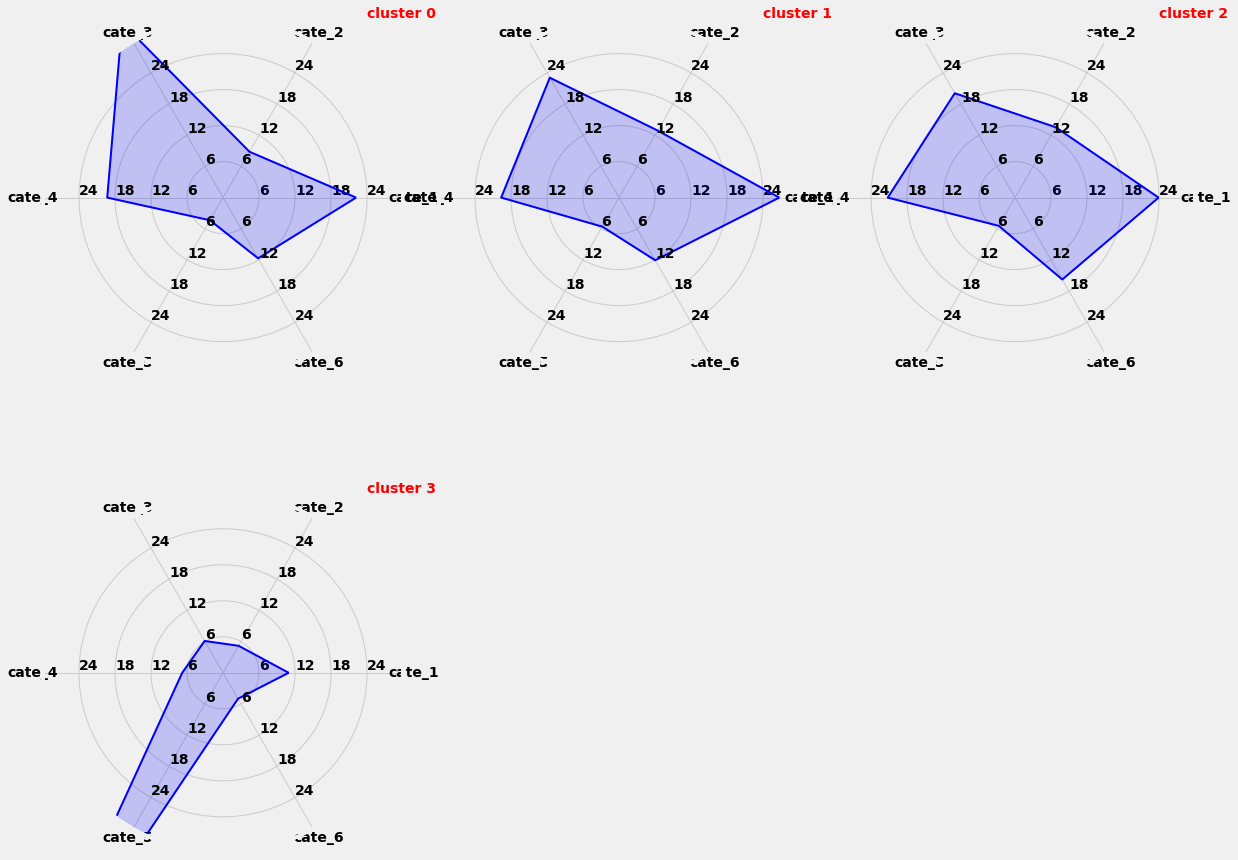

In [27]:
n_clusters = len(customer_clustering.index)
radar_chart(customer_clustering, n_clusters, n_attributes)

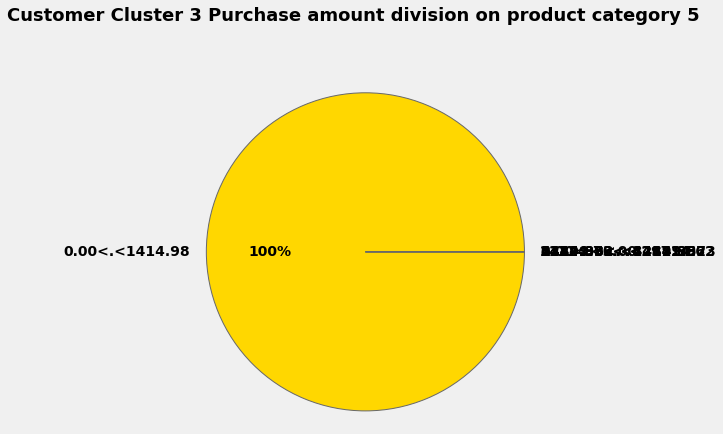

In [39]:
#for i in range(n_clusters):
    #for j in range(1, n_attributes+1):
        #pie_chart(temp_cate, i, j)
pie_chart(temp_cate, 3, 5)

 # Visualization of the results from normalized continuous data RFM with DBSCAN

In [32]:
n_attributes = len(dbscan_norm.columns) - 5
temp_norm = dbscan_norm[dbscan_norm['Cluster']!=-1]
customer_clustering = df_for_chart(temp_norm, n_attributes)
display(customer_clustering)

,Sum $,Med. $,Size,Med. Visit,Median $ per Visit,cate_1,cate_1 mean,cate_1 std,cate_2,cate_2 mean,...,cate_3 std,cate_4,cate_4 mean,cate_4 std,cate_5,cate_5 mean,cate_5 std,cate_6,cate_6 mean,cate_6 std
Cluster,,,,,,,,,,,,,,,,,,,,,
0,25592.20,226.240,108,1,206.680000,23.019787,54.548796,54.800850,10.340690,24.503796,...,50.069105,18.534046,43.919167,52.396802,7.489977,17.748611,42.832067,18.314565,43.399074,47.838498
1,1602141.18,573.645,2262,2,259.283750,27.139293,192.223603,184.521174,13.545292,95.939302,...,168.536702,17.469241,123.732051,126.012509,5.024769,35.589699,62.097708,14.453540,102.372286,132.732293
2,139486.38,271.000,421,1,220.100000,24.752359,82.009905,84.762639,12.034343,39.872375,...,84.998529,14.758509,48.898124,63.155096,8.113337,26.881235,54.217544,19.330246,64.045273,106.791381
3,163286.20,321.005,388,1,219.796667,25.932792,109.135747,119.746407,12.832664,54.005077,...,104.882814,14.958067,62.949639,76.298176,7.716421,32.473840,61.842317,17.271300,72.684665,103.593815
4,9530.99,250.000,29,1,226.370000,19.767306,64.966207,82.593590,10.006201,32.885862,...,72.248103,12.283089,40.368966,43.841282,9.653772,31.727586,59.964423,30.642987,100.709655,192.314208
5,5555.01,282.365,18,1,282.365000,23.208599,71.624444,83.293743,18.978364,58.569444,...,58.899406,10.724553,33.097222,37.213578,8.562541,26.425000,64.527880,19.158381,59.125000,69.367973


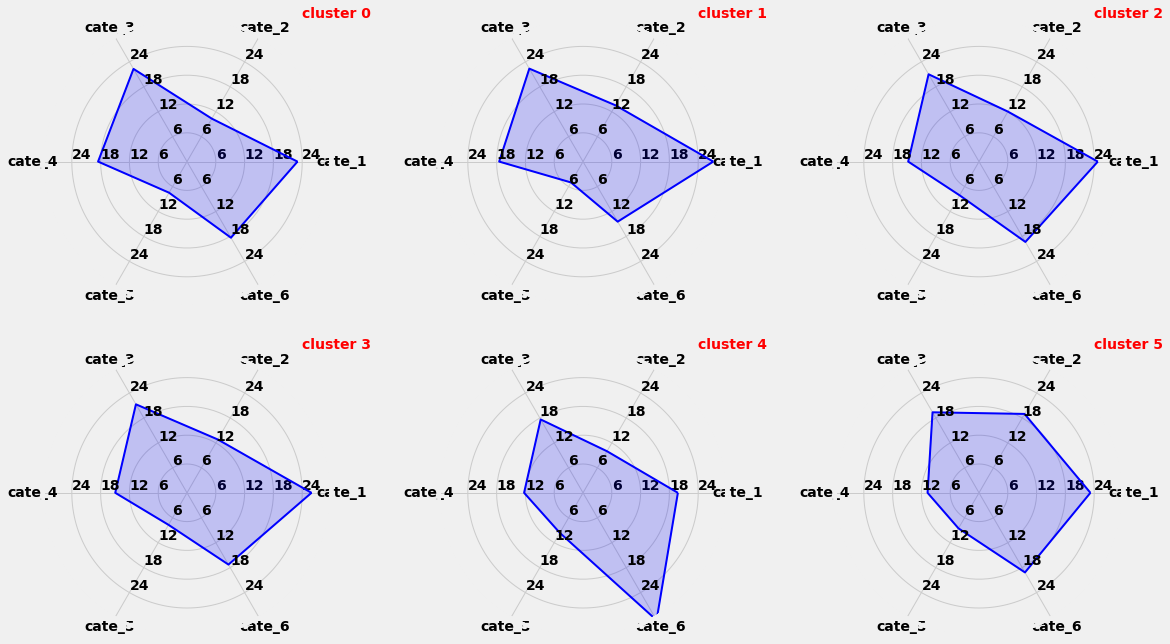

In [33]:
n_clusters = len(customer_clustering.index)
radar_chart(customer_clustering, n_clusters, n_attributes)

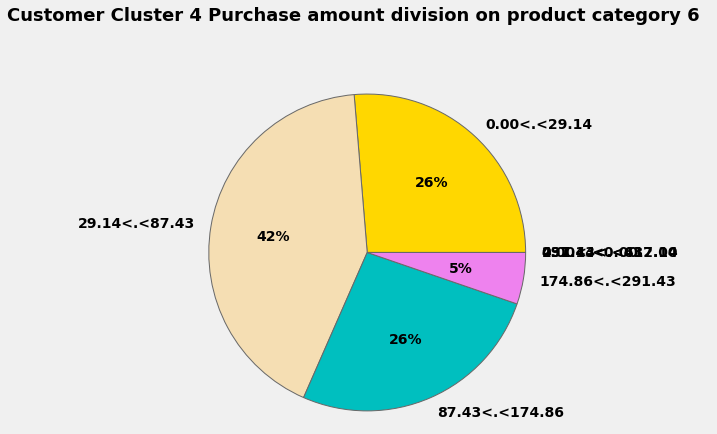

In [40]:
#for i in range(n_clusters):
    #for j in range(1, n_attributes+1):
        #pie_chart(temp_norm, i, j)
pie_chart(temp_norm, 4, 6)